<a href="https://colab.research.google.com/github/rpimaster/OAI/blob/main/01-convolution/convolution4-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!test -f lena.jpg || wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
from google.colab import files
import os
print('sobel.pth')
while not os.path.exists('sobel.pth'):
    files.upload()

--2025-10-29 15:36:28--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.002s  

2025-10-29 15:36:29 (43.3 MB/s) - ‘lena.jpg’ saved [91814/91814]

sobel.pth


Saving sobel.pth to sobel.pth


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
# define the model
class SobelFilter(nn.Module):
    # initialization
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1,1,(3,3),bias=False,padding=1)
    # forward
    def forward(self, x):
        return self.conv(x)

In [4]:
model = SobelFilter()
model.load_state_dict(torch.load('sobel.pth'))

<All keys matched successfully>

In [5]:
image = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
rows,cols = image.shape
input_images = torch.from_numpy(image).float().unsqueeze(0).unsqueeze(0)

In [6]:
output_images = model(input_images)

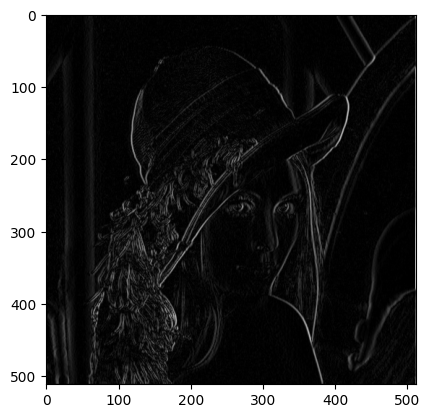

In [7]:
output_image = output_images[0].squeeze(0).detach().numpy()
output_image = abs(output_image);
output_image = cv2.normalize(output_image,None,0,255,cv2.NORM_MINMAX)
output_image = np.uint8(output_image)
plt.imshow(output_image, cmap='gray')
plt.show()